### Importing the dataset

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
dry_beans=pd.read_excel("Dry_Bean_Dataset.xlsx")

In [18]:
dry_beans.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [19]:
dry_beans.shape

(13611, 17)

In [5]:
#checking if the dataframe has any null values. 
dry_beans.isnull().values.any()

False

In [20]:
X= dry_beans.loc[:, "Area": "ShapeFactor4"]

In [21]:
Y=dry_beans.loc[:, "Class"]

## EDA

<AxesSubplot:xlabel='Class', ylabel='MajorAxisLength'>

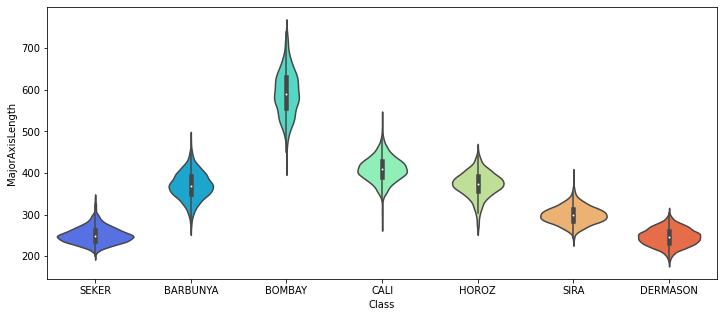

In [22]:
#analysing Class-wise distribution of Major Axis Lengths
fig=plt.figure(figsize=(12,5))
sns.violinplot(x="Class", y="MajorAxisLength", data=dry_beans,palette='rainbow')

<AxesSubplot:xlabel='Class', ylabel='MinorAxisLength'>

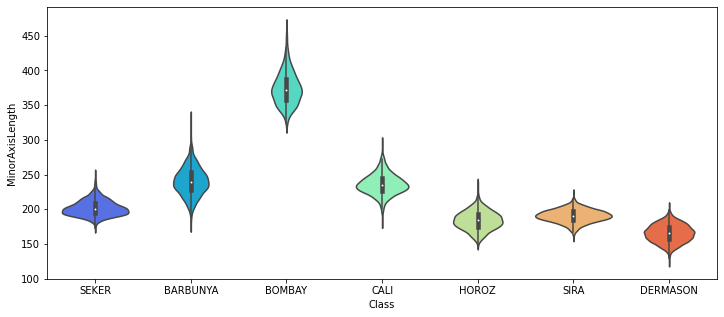

In [23]:
#Analysing Class-wise distribution of Minor axis lengths
fig=plt.figure(figsize=(12,5))
sns.violinplot(x="Class", y="MinorAxisLength", data=dry_beans,palette='rainbow')

<AxesSubplot:xlabel='Class', ylabel='AspectRation'>

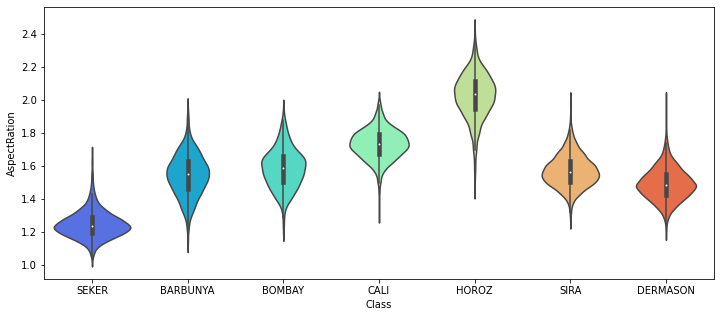

In [24]:
#Analysing Class-wise distributions of Aspect Ratios
fig=plt.figure(figsize=(12,5))
sns.violinplot(x="Class", y="AspectRation", data=dry_beans,palette='rainbow')

<AxesSubplot:>

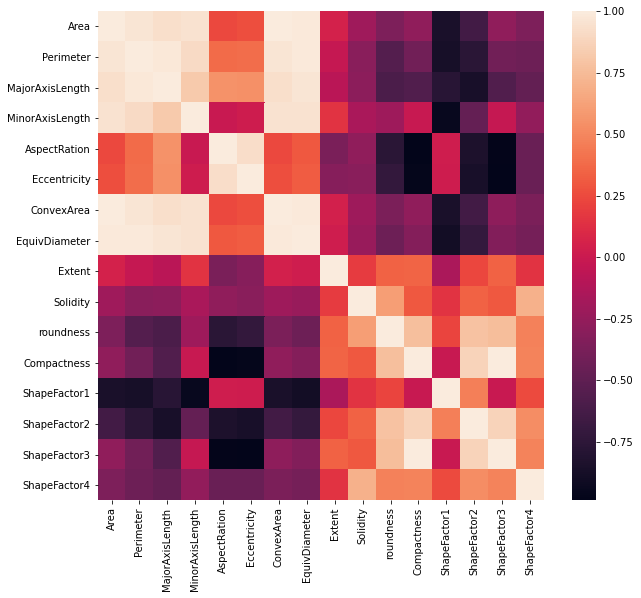

In [25]:
#Analysing correlations between various features in the dataset. 
fig=plt.figure(figsize=(10,9))
sns.heatmap(dry_beans.corr())

### Using support Vector Machine with Grid Search and RepeatedStratified k-fold- CrossValidation

In [26]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=101)

In [28]:
#using gridsearch to find the optimum values of hyperparameters
param_grid_ = {'C': [0.1,1, 10, 100], 'gamma': [ 10,1,0.1,0.01], 'kernel': ['rbf']} 

In [29]:
search= GridSearchCV(SVC(decision_function_shape='ovo'),param_grid_,refit=True,verbose=3, cv=cv) 

In [ ]:
#Normalising the data and applying PCA to reduce the no. of features before feeding it into SVM. 

In [30]:
scaler_=StandardScaler()

In [31]:
scaler_.fit(X)

StandardScaler()

In [32]:
scaled_X=scaler_.transform(X)

In [33]:
pca_=PCA(n_components=10, random_state=101)

In [36]:
pca_.fit(scaled_X)

PCA(n_components=10, random_state=101)

In [218]:
pca_X=pca_.transform(scaled_X)

In [37]:
sum(pca_.explained_variance_ratio_*100)
#Thus >99%  of the variance in the data is still retained even after reducing the components to 10. 

99.99055682893358

In [219]:
search.fit(pca_X, Y)

Fitting 30 folds for each of 16 candidates, totalling 480 fits
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.311, total=   8.9s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.309, total=   9.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.9s remaining:    0.0s


[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.305, total=  10.3s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.320, total=   9.8s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.309, total=   9.3s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.309, total=   9.6s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.315, total=  11.4s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.306, total=  11.3s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.314, total=  11.4s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] .

[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.928, total=   2.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.929, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.919, total=   1.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.933, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.899, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.932, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.924, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.913, total=   2.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.916, total=   2.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.713, total=  14.4s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.722, total=  15.5s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.726, total=  18.2s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.740, total=  15.5s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.719, total=  23.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] .

[CV] ............ C=1, gamma=1, kernel=rbf, score=0.936, total=   2.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.927, total=   3.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.922, total=   2.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.926, total=   3.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.931, total=   0.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.932, total=   0.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.923, total=   0.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.918, total=   1.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.926, total=   1.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.937, total=   1.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.927, total=   1.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.921, total=   1.5s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.927, total=   1.5s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .......... C=10, gamma=10, kernel=rbf, score=0.731, total=  24.2s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ........... C=10, gamma=1, kernel=rbf, score=0.915, total=   2.5s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.904, total=   3.3s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.916, total=   3.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.913, total=   2.9s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.934, total=   2.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.921, total=   3.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.913, total=   3.3s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.938, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.927, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.929, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.918, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.925, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.928, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.943, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.910, total=   4.7s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.910, total=   3.8s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.924, total=   3.7s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.904, total=   3.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.902, total=   3.8s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.890, total=   3.6s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.904, total=   4.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.933, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.927, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.938, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.934, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.937, total=   0.7s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.927, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.929, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 41.7min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=101),
             estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [221]:
print(search.best_score_)
print(search.best_params_)

0.9314765063982566
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
#Thus accuracy of the model on previously unseen data should be around 93%. Predictions can be made using search.fit(X_values)